In [202]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [203]:
participant = "RD_17_06"

def get_imot(id):
    path = './' + participant + '/' + 'imotions/' + 'Shovel' + '_' + id + '.csv'
    return pd.read_csv(path)

def get_unity(id):
    path = './' + participant + '/' + 'unity/' + 'Shovel' + '_' + id + '.csv'
    return pd.read_csv(path)

c_0_i_raw = get_imot("C0")
c_1_i_raw = get_imot("C1")
c_2_i_raw = get_imot("C2")
p_0_i_raw = get_imot("P0")
p_1_i_raw = get_imot("P1")
p_2_i_raw = get_imot("P2")

c_0_i_raw.head(3)

,Row,Timestamp,EventSource,SlideEvent,StimType,Duration,CollectionPhase,SourceStimuliName,EventSource.1,Heart rate,...,VSenseBatt RAW,VSenseBatt CAL,Internal ADC A13 PPG RAW,Internal ADC A13 PPG CAL,GSR RAW,GSR Resistance CAL,GSR Conductance CAL,Heart Rate PPG ALG,IBI PPG ALG,Packet reception rate RAW
0,1,3,SlideEvents,StartSlide,TestImage,3000000.0,StimuliDisplay,Screen recording 1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2633.0,3834.728205,2425.0,1776.556777,18150.0,180.782187,5.531518,-1.0,-1.0,99.0
2,3,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2627.0,3825.989744,2418.0,1771.428571,18150.0,180.782187,5.531518,-1.0,-1.0,99.0


In [204]:
c_0_u = get_unity("C0")
c_1_u = get_unity("C1")
c_2_u = get_unity("C2")
p_0_u = get_unity("P0")
p_1_u = get_unity("P1")
p_2_u = get_unity("P2")

c_0_u.head(3)

,ts_datetime,ts_unix_ms,primary_grab_hand,pt_x,pt_y,pt_z,st_x,st_y,st_z,pv_x,...,hmd_x,hmd_y,hmd_z,ee_x,ee_y,ee_z,shovel_loaded_state,cube_max_target_reached,grab_count,collision_or_load_count
0,6/17/2025 5:53:30 PM,1750175610072,Right,-0.021357,0.094515,-0.002608,-0.118737,0.627318,-0.184090,-0.021302,...,-0.098375,0.794819,0.019389,-2.479354e-08,0.070000,0.740000,False,0,1,0
1,6/17/2025 5:53:30 PM,1750175610100,Right,-0.023016,0.091584,-0.005350,-0.119463,0.626224,-0.184293,-0.023016,...,-0.098237,0.791466,0.018577,-1.024046e-01,0.784453,-0.257796,False,0,1,0
2,6/17/2025 5:53:30 PM,1750175610114,Right,-0.023578,0.090324,-0.007610,-0.119198,0.626212,-0.184651,-0.023673,...,-0.098234,0.789974,0.018391,-1.014712e-01,0.784550,-0.256713,False,0,1,0


In [205]:
unity_unix_key = "ts_unix_ms"
imot_unix_key = "System Timestamp CAL"
imot_ms_key = "Timestamp"
baseline_ms = 30_000

def task_start(df):
    return df[unity_unix_key].min()

def task_end(df):
    return df[(df["collision_or_load_count"] == 20)][(df["shovel_loaded_state"] == False)][unity_unix_key].min()

def get_trimmed_imot(df, unity_df):
    start = task_start(unity_df) - baseline_ms
    end = task_end(unity_df) + baseline_ms
    
    imot_start = df.dropna(subset = imot_unix_key).iloc[0][imot_unix_key]

    return df[(imot_start + df["Timestamp"] >= start)][(imot_start + df["Timestamp"] <= end)]

In [206]:
c_0_i = get_trimmed_imot(c_0_i_raw, c_0_u)
c_1_i = get_trimmed_imot(c_1_i_raw, c_1_u)
c_2_i = get_trimmed_imot(c_2_i_raw, c_2_u)
p_0_i = get_trimmed_imot(p_0_i_raw, p_0_u)
p_1_i = get_trimmed_imot(p_1_i_raw, p_1_u)
p_2_i = get_trimmed_imot(p_2_i_raw, p_2_u)

print("Unity grab start minus Baseline: ", c_0_u.iloc[0][unity_unix_key] - baseline_ms)
print("First trimmed iMotions entry:    ", c_0_i.dropna(subset = imot_unix_key).iloc[0][imot_unix_key])

Unity grab start minus Baseline:  1750175580072
First trimmed iMotions entry:     1750175580064.2764


C:\Users\elias\AppData\Local\Temp\ipykernel_16520\1559626125.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[(df["collision_or_load_count"] == 20)][(df["shovel_loaded_state"] == False)][unity_unix_key].min()
C:\Users\elias\AppData\Local\Temp\ipykernel_16520\1559626125.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[(imot_start + df["Timestamp"] >= start)][(imot_start + df["Timestamp"] <= end)]
C:\Users\elias\AppData\Local\Temp\ipykernel_16520\1559626125.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[(df["collision_or_load_count"] == 20)][(df["shovel_loaded_state"] == False)][unity_unix_key].min()
C:\Users\elias\AppData\Local\Temp\ipykernel_16520\1559626125.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[(df["collision_or_load_count"] == 20)][(df["shovel_loaded_state"] == False)][unity_unix_key].min()

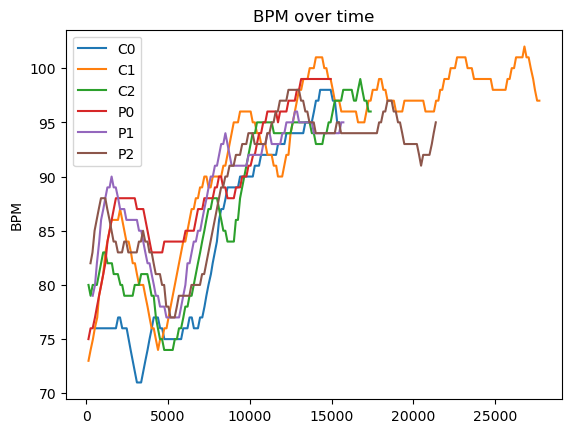

In [207]:
hr_key = 'Heart rate'

def plot_hr(df, label):
    df_cleaned = df.dropna(subset = hr_key)
    plt.plot(df_cleaned[hr_key], label=label)

plot_hr(c_0_i, "C0")
plot_hr(c_1_i, "C1")
plot_hr(c_2_i, "C2")
plot_hr(p_0_i, "P0")
plot_hr(p_1_i, "P1")
plot_hr(p_2_i, "P2")


plt.legend()
plt.title('BPM over time')
plt.ylabel('BPM')
#display plot
plt.show()

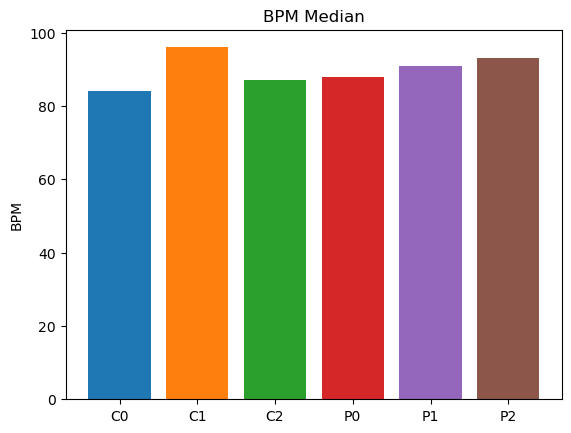

In [208]:
def median_hr(df):
    df_cleaned = df.dropna(subset = hr_key)
    return df_cleaned[hr_key].median()

labels = ['C0', 'C1', 'C2', 'P0', 'P1', 'P2']
deltas = [
    median_hr(c_0_i),
    median_hr(c_1_i),
    median_hr(c_2_i),
    median_hr(p_0_i),
    median_hr(p_1_i),
    median_hr(p_2_i)
    ]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

plt.bar(labels, deltas, color=colors)
plt.title('BPM Median')
plt.ylabel('BPM')
plt.show()

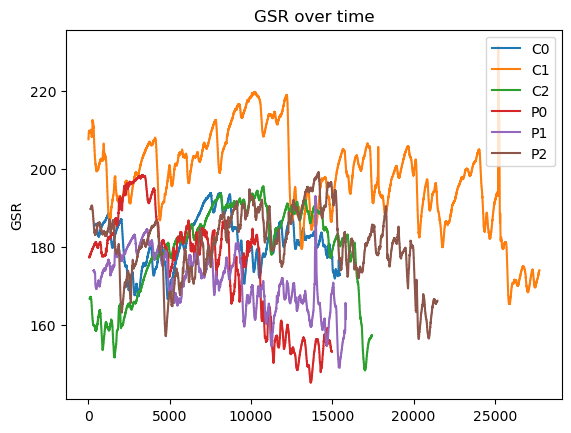

In [209]:
gsr_key = 'GSR Resistance CAL'
max_z_score = 3

def plot_gsr(df, label):
    df_cleaned = df.dropna(subset = gsr_key)
    df_smoothed = df_cleaned[np.abs(stats.zscore(df_cleaned[gsr_key])) < max_z_score]
    plt.plot(df_smoothed[gsr_key], label=label)

plot_gsr(c_0_i, "C0")
plot_gsr(c_1_i, "C1")
plot_gsr(c_2_i, "C2")
plot_gsr(p_0_i, "P0")
plot_gsr(p_1_i, "P1")
plot_gsr(p_2_i, "P2")


plt.legend()
plt.title('GSR over time')
plt.ylabel('GSR')
#display plot
plt.show()

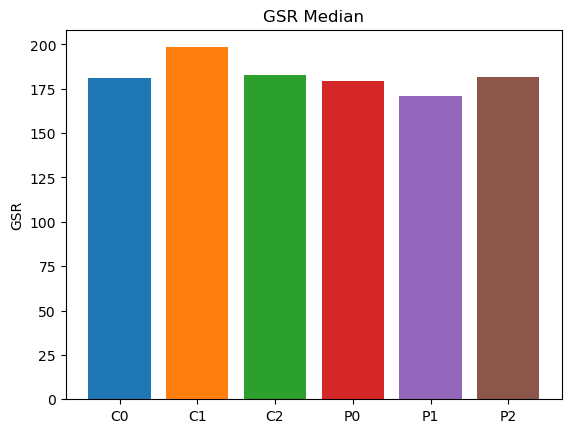

In [210]:
def median_gsr(df):
    df_cleaned = df.dropna(subset = gsr_key)
    df_smoothed = df_cleaned[np.abs(stats.zscore(df_cleaned[gsr_key])) < max_z_score]
    return df_smoothed[gsr_key].median()

labels = ['C0', 'C1', 'C2', 'P0', 'P1', 'P2']
deltas = [
    median_gsr(c_0_i),
    median_gsr(c_1_i),
    median_gsr(c_2_i),
    median_gsr(p_0_i),
    median_gsr(p_1_i),
    median_gsr(p_2_i)
    ]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

plt.bar(labels, deltas, color=colors)
plt.title('GSR Median')
plt.ylabel('GSR')
plt.show()

C:\Users\elias\AppData\Local\Temp\ipykernel_16520\1559626125.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[(df["collision_or_load_count"] == 20)][(df["shovel_loaded_state"] == False)][unity_unix_key].min()
C:\Users\elias\AppData\Local\Temp\ipykernel_16520\1559626125.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[(df["collision_or_load_count"] == 20)][(df["shovel_loaded_state"] == False)][unity_unix_key].min()
C:\Users\elias\AppData\Local\Temp\ipykernel_16520\1559626125.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[(df["collision_or_load_count"] == 20)][(df["shovel_loaded_state"] == False)][unity_unix_key].min()
C:\Users\elias\AppData\Local\Temp\ipykernel_16520\1559626125.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[(df["collision_or_load_count"] == 20)][(df["shovel_loaded_state"] == False)][un

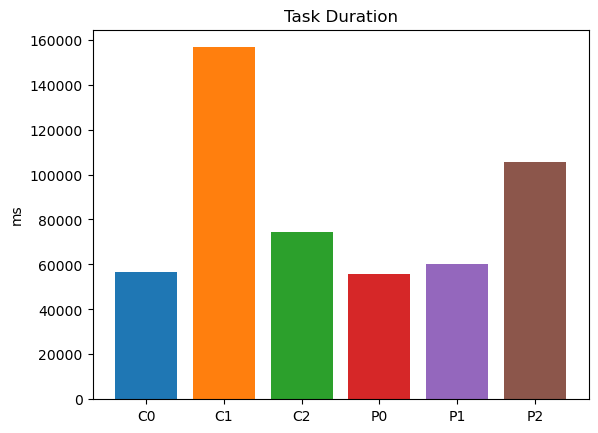

In [211]:
def task_duration(df):
    return task_end(df) - task_start(df)

labels = ['C0', 'C1', 'C2', 'P0', 'P1', 'P2']
deltas = [
    task_duration(c_0_u),
    task_duration(c_1_u),
    task_duration(c_2_u),
    task_duration(p_0_u),
    task_duration(p_1_u),
    task_duration(p_2_u)
    ]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

plt.bar(labels, deltas, color=colors)
plt.title('Task Duration')
plt.ylabel('ms')
plt.show()